<a href="https://colab.research.google.com/github/RG2806/Image_Recognition_CNN/blob/master/Question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!unzip -q "/content/drive/My Drive/question_1/MOHD_FAISAL_CH16B110-20200409T092759Z-001.zip"

replace MOHD_FAISAL_CH16B110/question_1/README.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:

train_path = '/content/MOHD_FAISAL_CH16B110/question_1/question_1_dataset/train/train'
valid_path = train_path
test_path = '/content/MOHD_FAISAL_CH16B110/question_1/question_1_dataset/test/test'
traincsv_path = '/content/MOHD_FAISAL_CH16B110/question_1/question_1_dataset/Train.csv'
testcsv_path = '/content/MOHD_FAISAL_CH16B110/question_1/question_1_dataset/Test.csv'

In [0]:
import tensorflow as tf

In [0]:
import pandas as pd
import numpy as np
from os import listdir
from glob import glob
import itertools
import fnmatch
import random
import matplotlib.pylab as plt
from IPython.display import SVG
import seaborn as sns
import cv2
#from scipy.misc import imresize, imread
import sklearn
from keras.utils.vis_utils import plot_model
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, learning_curve, GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from keras.utils.vis_utils import model_to_dot
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import keras
from keras import backend as K
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, model_from_json
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D, Lambda
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
import tensorflow_hub as hub
from tensorflow.keras import layers
from keras.optimizers import Adam,SGD

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
path_name = train_path + '/**/*.png'
imagePatches = glob(path_name, recursive=True)
for filename in imagePatches[0:10]:
    print(filename)

/content/MOHD_FAISAL_CH16B110/question_1/question_1_dataset/train/train/808.png
/content/MOHD_FAISAL_CH16B110/question_1/question_1_dataset/train/train/1130.png
/content/MOHD_FAISAL_CH16B110/question_1/question_1_dataset/train/train/1381.png
/content/MOHD_FAISAL_CH16B110/question_1/question_1_dataset/train/train/945.png
/content/MOHD_FAISAL_CH16B110/question_1/question_1_dataset/train/train/1920.png
/content/MOHD_FAISAL_CH16B110/question_1/question_1_dataset/train/train/2317.png
/content/MOHD_FAISAL_CH16B110/question_1/question_1_dataset/train/train/737.png
/content/MOHD_FAISAL_CH16B110/question_1/question_1_dataset/train/train/1344.png
/content/MOHD_FAISAL_CH16B110/question_1/question_1_dataset/train/train/24.png
/content/MOHD_FAISAL_CH16B110/question_1/question_1_dataset/train/train/2887.png


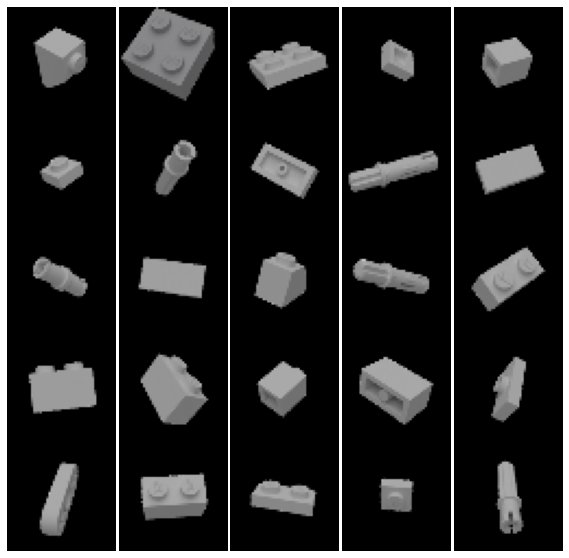

In [0]:
bunchOfImages = imagePatches
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in bunchOfImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (50, 50)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

In [0]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
def loadBatchImages(path):
    image_df = pd.read_csv(traincsv_path)
    name_arr = image_df.iloc[:,0:1].to_numpy()
    name_arr_train = name_arr
    label_arr = image_df.iloc[:,1:2].to_numpy()
    label_arr_train = label_arr
    loadedImagesTrain = []
    loadedLabelsTrain = []
    for i in range(len(name_arr_train)):
        name_path = path + '/' + name_arr_train[i][0]
        img = load_img(name_path)
        img = img_to_array(img)
        loadedLabelsTrain.append(label_arr_train[i][0])
        loadedImagesTrain.append(img)
    return loadedImagesTrain, loadedLabelsTrain

In [0]:
loadedImagesTrain, loadedLabelsTrain = loadBatchImages(train_path)

In [0]:
counts = np.bincount(loadedLabelsTrain)
print(counts)

[  0 254 271 271 271 299 299 299 271 274 271 299 300 273 271 271 271]


In [0]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(loadedLabelsTrain)
encoded_loadedLabelsTrain = encoder.transform(loadedLabelsTrain)
len(encoded_loadedLabelsTrain)
counts = np.bincount(encoded_loadedLabelsTrain)
print(counts)

[254 271 271 271 299 299 299 271 274 271 299 300 273 271 271 271]


In [0]:
#convert from list to numpy array
loadedImagesTrain = np.asarray(loadedImagesTrain)
encoded_loadedLabelsTrain = np.asarray(encoded_loadedLabelsTrain)
print(loadedImagesTrain.shape, encoded_loadedLabelsTrain.shape)

(4465, 200, 200, 3) (4465,)


In [0]:
def loadBatchImagesValid(path):
    image_df = pd.read_csv(traincsv_path)
    name_arr = image_df.iloc[:,0:1].to_numpy()
    label_arr = image_df.iloc[:,1:2].to_numpy()
    name_arr_valid = name_arr[round(len(name_arr)*0.8):]
    label_arr_valid = label_arr[round(len(label_arr)*0.8):]
    loadedImagesValid = []
    loadedLabelsValid = []
    for i in range(len(name_arr_valid)):
        name_path = path + '/' + name_arr_valid[i][0]
        img = load_img(name_path)
        img = img_to_array(img)
        loadedLabelsValid.append(label_arr_valid[i][0])
        loadedImagesValid.append(img)
    return loadedImagesValid, loadedLabelsValid

In [0]:
loadedImagesValid, loadedLabelsValid = loadBatchImagesValid(valid_path)
loadedImagesValid = np.asarray(loadedImagesValid)
encoder.fit(loadedLabelsValid)
encoded_loadedLabelsValid = encoder.transform(loadedLabelsValid)
encoded_loadedLabelsValid = np.asarray(encoded_loadedLabelsValid)
print(loadedImagesValid.shape, encoded_loadedLabelsValid.shape)

(893, 200, 200, 3) (893,)


In [0]:
X_train, X_test, Y_train, Y_test = loadedImagesTrain,loadedImagesValid,encoded_loadedLabelsTrain, encoded_loadedLabelsValid
del loadedImagesTrain,encoded_loadedLabelsTrain
del loadedImagesValid, encoded_loadedLabelsValid
import gc
gc.collect()

47401

In [0]:
from keras.utils.np_utils import to_categorical
y_trainHot = to_categorical(Y_train, num_classes = 16)
y_testHot = to_categorical(Y_test, num_classes = 16)
y_trainHot.shape

(4465, 16)

In [0]:
batch_size = 128
num_classes = 16
epochs = 10
img_rows,img_cols=200,200
input_shape = (img_rows, img_cols, 3)
e = 2

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 196, 196, 32)      1344      
_________________________________________________________________
batch_normalization_1 (Batch (None, 196, 196, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 94, 94, 64)       

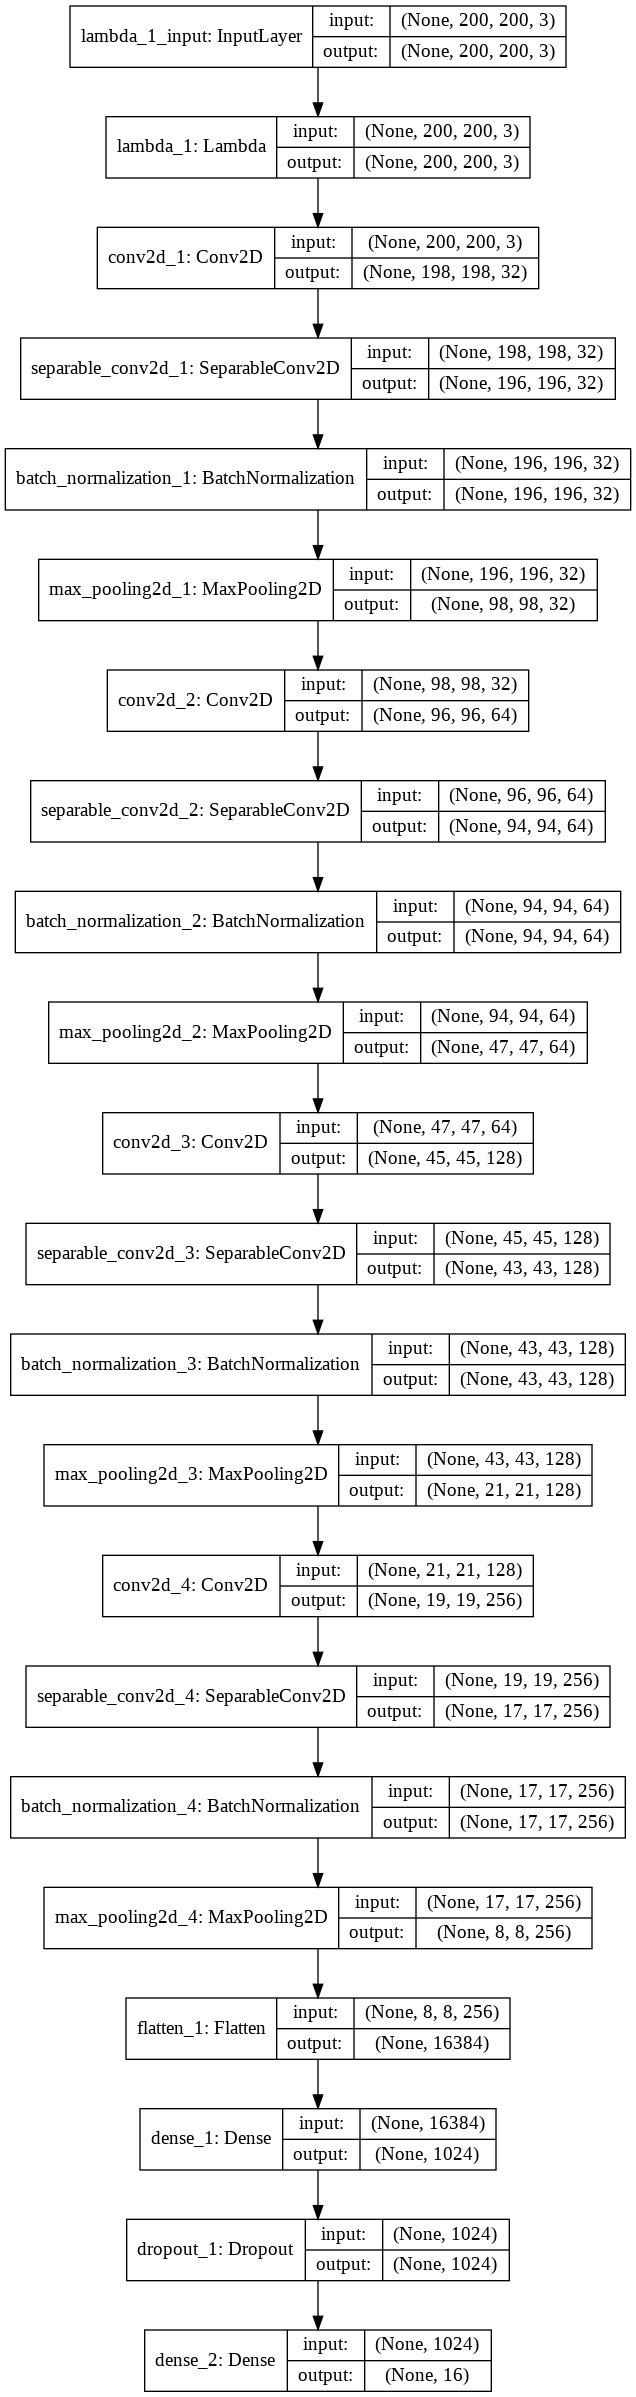

In [0]:
def ConvBlock(model, layers, filters):
    for i in range(layers):
        model.add(Conv2D(filters,(3,3),activation='selu'))
        model.add(SeparableConv2D(filters, (3, 3), activation='selu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D((2, 2), strides=(2, 2)))


def FCN():
    model = Sequential()
    model.add(Lambda(lambda x: x, input_shape=(200, 200, 3)))
    ConvBlock(model, 1, 32)
    ConvBlock(model, 1, 64)
    ConvBlock(model, 1, 128)
    ConvBlock(model, 1, 256)
    model.add(Flatten())
    model.add(Dense(1024,activation='selu'))
    model.add(Dropout(0.5))
    model.add(Dense(16,activation='softmax'))
    return model

model = FCN()
model.summary()

SVG(model_to_dot(model).create(prog='dot', format='svg'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, expand_nested=True)

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

In [0]:
a = X_train
b = y_trainHot
c = X_test
d = y_testHot
epochs = 30


In [0]:
best_model_weights = './base.model'
checkpoint = ModelCheckpoint(
    best_model_weights,
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min',
    save_weights_only=False,
    period=1
)
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=10,
    verbose=1,
    mode='auto'
)
tensorboard = TensorBoard(
    log_dir = './logs',
    histogram_freq=0,
    batch_size=16,
    write_graph=True,
    write_grads=True,
    write_images=False,
)
csvlogger = CSVLogger(
    filename= "training_csv.log",
    separator = ",",
    append = False
)

#lrsched = LearningRateScheduler(step_decay,verbose=1)

reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=40,
    verbose=1, 
    mode='auto',
    cooldown=1 
)
callbacks = [checkpoint,tensorboard,csvlogger,reduce]

/usr/local/lib/python3.6/dist-packages/keras/callbacks/tensorboard_v2.py:92: UserWarning: The TensorBoard callback `batch_size` argument (for histogram computation) is deprecated with TensorFlow 2.0. It will be ignored.
  warnings.warn('The TensorBoard callback `batch_size` argument '
/usr/local/lib/python3.6/dist-packages/keras/callbacks/tensorboard_v2.py:97: UserWarning: The TensorBoard callback does not support gradients display when using TensorFlow 2.0. The `write_grads` argument is ignored.
  warnings.warn('The TensorBoard callback does not support '


In [0]:
opt = SGD(lr=1e-4,momentum=0.99)
opt1 = Adam(lr=2e-4)

model.compile(
    loss='binary_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)
    
history = model.fit_generator(
    datagen.flow(a,b, batch_size=32), 
    steps_per_epoch  = len(a) / 32, 
    validation_data  = [c,d],
    validation_steps = 100,
    epochs = epochs, 
    verbose = 1,
    callbacks=callbacks
)

Epoch 1/30
140/139 [==============================] - 48s 345ms/step - loss: 0.3263 - accuracy: 0.9160 - val_loss: 0.2190 - val_accuracy: 0.9375

Epoch 00001: val_loss improved from inf to 0.21896, saving model to ./base.model
Epoch 2/30
140/139 [==============================] - 41s 295ms/step - loss: 0.2487 - accuracy: 0.9252 - val_loss: 0.1841 - val_accuracy: 0.9382

Epoch 00002: val_loss improved from 0.21896 to 0.18414, saving model to ./base.model
Epoch 3/30
140/139 [==============================] - 41s 294ms/step - loss: 0.2337 - accuracy: 0.9261 - val_loss: 0.1537 - val_accuracy: 0.9450

Epoch 00003: val_loss improved from 0.18414 to 0.15366, saving model to ./base.model
Epoch 4/30
140/139 [==============================] - 41s 293ms/step - loss: 0.2187 - accuracy: 0.9295 - val_loss: 0.1522 - val_accuracy: 0.9462

Epoch 00004: val_loss improved from 0.15366 to 0.15217, saving model to ./base.model
Epoch 5/30
140/139 [==============================] - 41s 294ms/step - loss: 0.2

In [0]:
import numpy as np
data = np.load('logs.npy', allow_pickle = True)
print(data)

In [0]:
#plot the accuracies and losses against epoch
def plot_learning_curve(history):
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    #plt.clf()
    # summarize history for loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.savefig('./loss_curve.png')

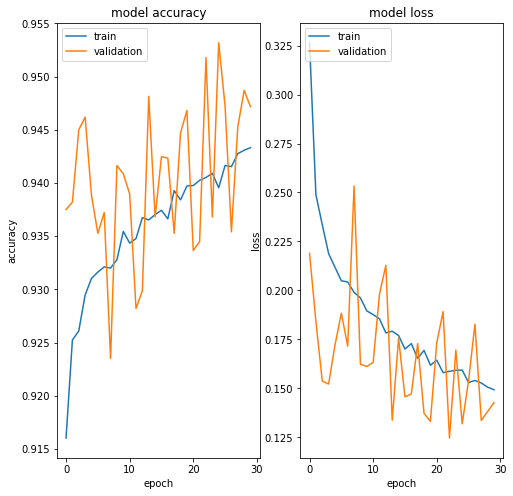

In [0]:
plot_learning_curve(history)
plt.show()

In [0]:
model_score = model.evaluate_generator(datagen.flow(c,d, batch_size=32))
print("Model Test Loss:",model_score[0])
print("Model Test Accuracy:",model_score[1])

Model Test Loss: 0.13307294249534607
Model Test Accuracy: 0.9504479169845581


In [0]:
#load the test data in to list and convert it to array
image_df = pd.read_csv(testcsv_path)
name_arr_test = image_df.iloc[:,0:1].to_numpy()
loadedImagesTest = []
for i in range(len(name_arr_test)):
    name_path = test_path + '/' + name_arr_test[i][0]
    img = load_img(name_path)
    img = img_to_array(img)
    loadedImagesTest.append(img)
loadedImagesTest = np.asarray(loadedImagesTest)
X_real_test = loadedImagesTest
del loadedImagesTest

In [0]:
a = name_arr_test.T.ravel()

In [0]:
test_pred = model.predict(X_real_test)
test_pred = np.argmax(test_pred, axis=1)
for i in range(len(test_pred)):
    test_pred[i] += 1

In [0]:
#save the test prediction into csv format
np.savetxt('submission.csv', test_pred, delimiter=",", header = 'category')